<a href="https://colab.research.google.com/github/amruthvkbhat-creator/MachineLearning/blob/main/ML_Apriori_Algoritm_Frequent_itemsets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install efficient_apriori

In [ ]:
from efficient_apriori import apriori

In [ ]:

from efficient_apriori import apriori

transactions = [
    ("milk", "bread"),
    ("milk", "eggs", "bread"),
    ("eggs", "flour"),
    ("milk", "eggs"),
    ("bread", "butter"),
]

itemsets, rules = apriori(
    transactions,
    min_support=0.2,
    min_confidence=0.5
)

print("Frequent itemsets:")
for k in itemsets:               # k is size of itemset, for example 1 item, 2 items
    print("k =", k, ",", itemsets[k])

print("\nRules:")
for r in rules:
    print(f"{r} [support={r.support:.2f}, conf={r.confidence:.2f}, lift={r.lift:.2f}]")

Frequent itemsets:
k = 1 , {('milk',): 3, ('bread',): 3, ('eggs',): 3, ('flour',): 1, ('butter',): 1}
k = 2 , {('bread', 'butter'): 1, ('bread', 'eggs'): 1, ('bread', 'milk'): 2, ('eggs', 'flour'): 1, ('eggs', 'milk'): 2}
k = 3 , {('bread', 'eggs', 'milk'): 1}

Rules:
{butter} -> {bread} (conf: 1.000, supp: 0.200, lift: 1.667, conv: 400000000.000) [support=0.20, conf=1.00, lift=1.67]
{milk} -> {bread} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{bread} -> {milk} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{flour} -> {eggs} (conf: 1.000, supp: 0.200, lift: 1.667, conv: 400000000.000) [support=0.20, conf=1.00, lift=1.67]
{milk} -> {eggs} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{eggs} -> {milk} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{eggs, milk} -> {bread} (conf: 0.500, supp: 0.200, lift: 0.833, con

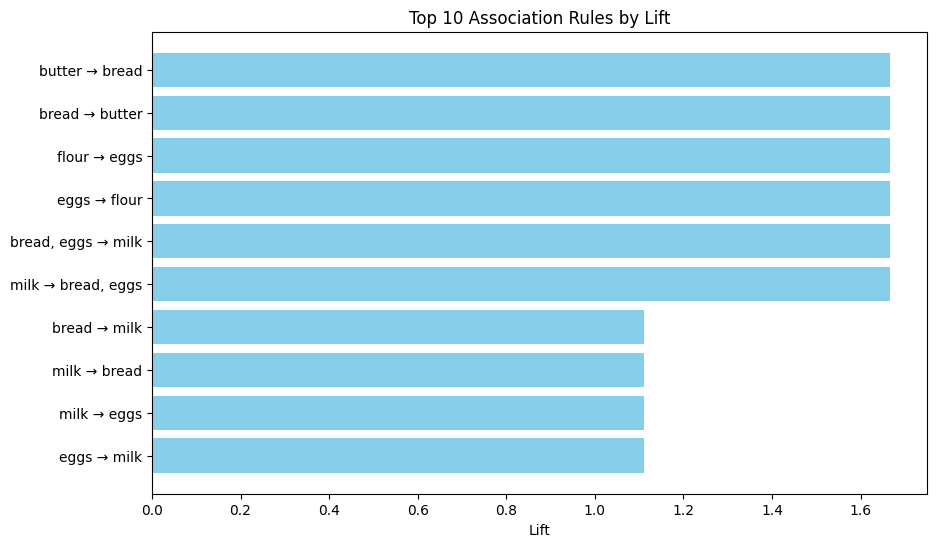

In [ ]:
!pip -q install efficient-apriori pandas

import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori

itemsets, rules = apriori(transactions, min_support=0.01, min_confidence=0.2)

rules_df = pd.DataFrame([{
    'Rule': f"{', '.join(list(r.lhs))} → {', '.join(list(r.rhs))}",
    'Support': r.support,
    'Confidence': r.confidence,
    'Lift': r.lift
} for r in rules])

rules_df = rules_df.sort_values('Lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(rules_df['Rule'], rules_df['Lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


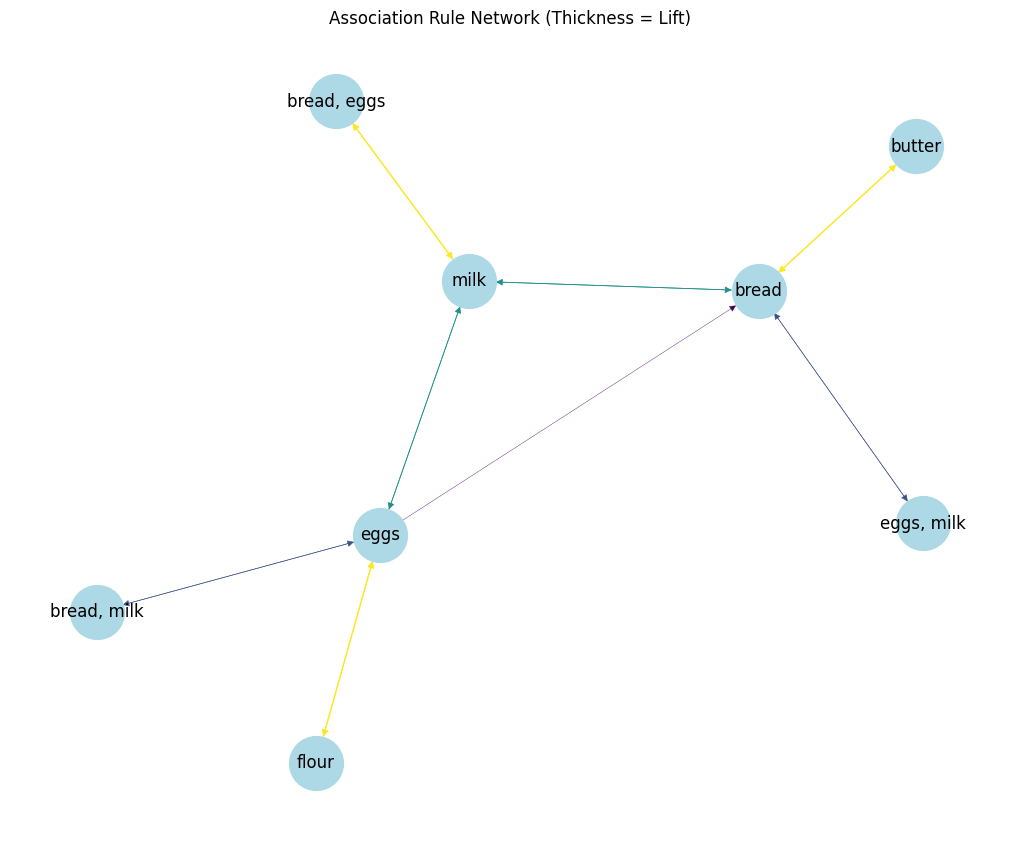

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for r in sorted(rules, key=lambda x: x.lift, reverse=True)[:15]:
    lhs = ', '.join(list(r.lhs))
    rhs = ', '.join(list(r.rhs))
    G.add_edge(lhs, rhs, weight=r.lift)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.4)
edges = G.edges(data=True)

weights = [d['weight'] for (_, _, d) in edges]
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500,
        edge_color=weights, width=[w/2 for w in weights], cmap=plt.cm.Blues, arrows=True)

plt.title("Association Rule Network (Thickness = Lift)")
plt.show()


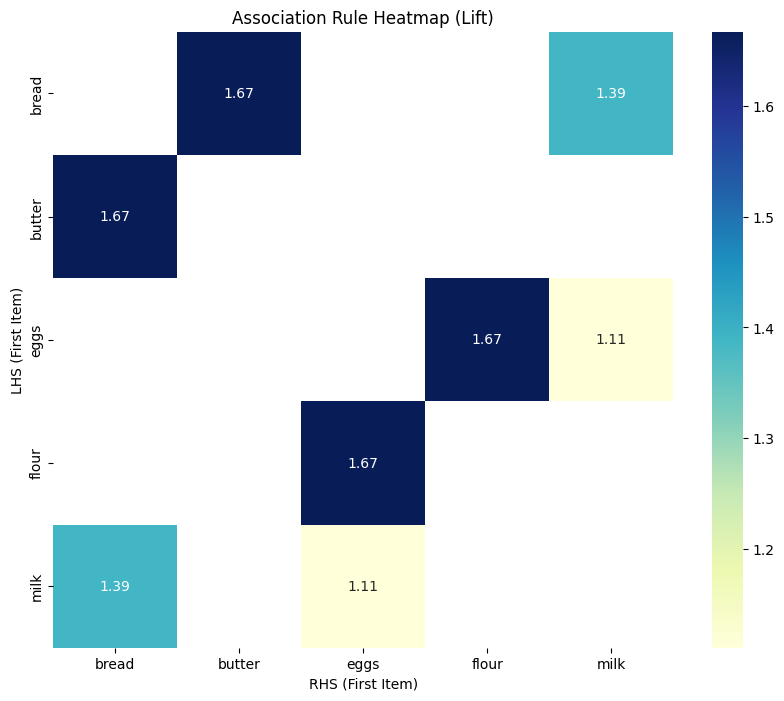

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the dataframe to get a matrix for the heatmap
# We will use the first item in the LHS as the row, the first item in the RHS as the column, and Lift as the value.
# This is a simplification, and a more complex heatmap might be needed for rules with multiple items in LHS or RHS.
heatmap_data = rules_df.pivot_table(index=rules_df['Rule'].apply(lambda x: x.split(' → ')[0].split(', ')[0]),
                                     columns=rules_df['Rule'].apply(lambda x: x.split(' → ')[1].split(', ')[0]),
                                     values='Lift')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Association Rule Heatmap (Lift)')
plt.xlabel('RHS (First Item)')
plt.ylabel('LHS (First Item)')
plt.show()